In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
PATH = "../../Datasets/"

Open the dataset per day

In [4]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

We will just use the samples from December 12th to January 6th

In [30]:
dfHolidays = dfDay[((dfDay["Time"].dt.month == 12) & (dfDay["Time"].dt.day >= 12)) | ((dfDay["Time"].dt.month == 1) & (dfDay["Time"].dt.day <= 6))]

In [6]:
for d in dfHolidays["Time"].unique():
    print(d.date())

2015-12-12
2015-12-13
2015-12-14
2015-12-15
2015-12-16
2015-12-17
2015-12-18
2015-12-19
2015-12-20
2015-12-21
2015-12-22
2015-12-23
2015-12-24
2015-12-25
2015-12-26
2015-12-27
2015-12-28
2015-12-29
2015-12-30
2015-12-31
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-12-12
2016-12-13
2016-12-14
2016-12-15
2016-12-16
2016-12-17
2016-12-18
2016-12-19
2016-12-20
2016-12-21
2016-12-22
2016-12-23
2016-12-24
2016-12-25
2016-12-26
2016-12-27
2016-12-28
2016-12-29
2016-12-30
2016-12-31
2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-12-12
2017-12-13
2017-12-14
2017-12-15
2017-12-16
2017-12-17
2017-12-18
2017-12-19
2017-12-20
2017-12-21
2017-12-22
2017-12-23
2017-12-24
2017-12-25
2017-12-26
2017-12-27
2017-12-28
2017-12-29
2017-12-30
2017-12-31
2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-06
2018-12-12
2018-12-13
2018-12-14
2018-12-15
2018-12-16
2018-12-17
2018-12-18
2018-12-19
2018-12-20
2018-12-21
2018-12-22
2018-12-23
2018-12-24

In [26]:
dfHolidays.head()

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg
133,2015-12-12,OK,BDL,OK,BDL,OK,OK,OK,184.0,0.0,14.633308,26.578040,0.090375,3.584044,0.422794,0.484406,16.999472,12.505837,16.226500,71.200583,2.211408,NaN,803.708333,152.335903
134,2015-12-13,OK,BDL,OK,BDL,OK,OK,BDL,200.0,5.5,13.522187,18.169847,-0.067333,2.581931,0.476542,0.449069,5.206549,3.205486,14.964972,74.466938,2.167250,NaN,804.208333,153.137639
135,2015-12-14,OK,BDL,OK,BDL,OK,OK,OK,156.0,0.0,14.152771,19.063264,-0.299035,2.215868,0.151667,0.466104,5.994694,3.573076,13.694283,75.840042,1.670621,NaN,805.166667,218.674514
136,2015-12-15,OK,BDL,OK,BDL,OK,OK,OK,146.0,0.0,12.672623,21.334736,-0.235396,2.015646,0.633313,0.515750,8.255219,5.113354,14.467742,73.714590,2.086732,NaN,805.458333,224.452222
137,2015-12-16,OK,BDL,OK,BDL,OK,OK,OK,162.0,0.0,13.601066,17.470945,0.036345,5.599611,1.900104,0.541411,9.049562,5.194388,15.044051,69.829333,1.795034,NaN,805.958333,224.471181


Exploration

In [31]:
dfHolidays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 133 to 3431
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        259 non-null    datetime64[ns]
 1   O3_flag     258 non-null    object        
 2   SO2_flag    258 non-null    object        
 3   NO2_flag    258 non-null    object        
 4   NO_flag     258 non-null    object        
 5   CO_flag     258 non-null    object        
 6   PM10_flag   258 non-null    object        
 7   PM2.5_flag  258 non-null    object        
 8   WDir_Avg    248 non-null    float64       
 9   Rain_Tot    259 non-null    float64       
 10  WDir_SD     248 non-null    float64       
 11  O3          133 non-null    float64       
 12  SO2         168 non-null    float64       
 13  NO2         130 non-null    float64       
 14  NO          130 non-null    float64       
 15  CO          210 non-null    float64       
 16  PM10        201 non-null    

In [32]:
dfHolidays.shape

(259, 24)

Data cleaning

In [38]:
dfHolidays = dfHolidays[dfHolidays["CO_flag"].notna()]

In [39]:
dfHolidays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 133 to 3431
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        258 non-null    datetime64[ns]
 1   O3_flag     258 non-null    object        
 2   SO2_flag    258 non-null    object        
 3   NO2_flag    258 non-null    object        
 4   NO_flag     258 non-null    object        
 5   CO_flag     258 non-null    object        
 6   PM10_flag   258 non-null    object        
 7   PM2.5_flag  258 non-null    object        
 8   WDir_Avg    247 non-null    float64       
 9   Rain_Tot    258 non-null    float64       
 10  WDir_SD     247 non-null    float64       
 11  O3          133 non-null    float64       
 12  SO2         168 non-null    float64       
 13  NO2         130 non-null    float64       
 14  NO          130 non-null    float64       
 15  CO          210 non-null    float64       
 16  PM10        201 non-null    

In [40]:
dfHolidays["PM2.5_flag"].value_counts()

PM2.5_flag
OS     178
OK      78
BDL      2
Name: count, dtype: int64

In [41]:
dfHolidays["PM10_flag"].value_counts()

PM10_flag
OK     191
OS      64
BDL      3
Name: count, dtype: int64

In [42]:
dfHolidays["CO_flag"].value_counts()

CO_flag
OK    208
OS     50
Name: count, dtype: int64

In [ ]:
variables = ["Time", "PM10", "PM10_flag", "PM2.5", "PM2.5_flag", "CO", "CO_flag", "SO2", "SO2_flag", "NO2", "NO2_flag", "NO", "NO_flag", "O3", "O3_flag",
             "Temp_Avg", "WSpeed_Avg", "WDir_Avg", "WDir_SD", "Rain_Tot"]

In [44]:
dfHolidays = dfHolidays[variables]

Data visualization

In [48]:
dfPlot = dfHolidays[dfHolidays["PM10_flag"] == "OK"]

In [49]:
dfPlot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 133 to 3431
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        191 non-null    datetime64[ns]
 1   PM10        191 non-null    float64       
 2   PM10_flag   191 non-null    object        
 3   PM2.5       80 non-null     float64       
 4   PM2.5_flag  191 non-null    object        
 5   CO          169 non-null    float64       
 6   CO_flag     191 non-null    object        
 7   SO2         145 non-null    float64       
 8   SO2_flag    191 non-null    object        
 9   NO2         103 non-null    float64       
 10  NO2_flag    191 non-null    object        
 11  NO          103 non-null    float64       
 12  NO_flag     191 non-null    object        
 13  O3          102 non-null    float64       
 14  O3_flag     191 non-null    object        
 15  Temp_Avg    186 non-null    float64       
 16  WSpeed_Avg  186 non-null    

In [52]:
dfPlot1 = dfPlot[((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2016) & (dfPlot["Time"].dt.month == 12))]
dfPlot2 = dfPlot[((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 12))]
dfPlot3 = dfPlot[((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 12))]
dfPlot4 = dfPlot[((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 12))]
dfPlot5 = dfPlot[((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 12))]
dfPlot6 = dfPlot[((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 12))]
dfPlot7 = dfPlot[((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 12))]
dfPlot8 = dfPlot[((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 12))]
dfPlot9 = dfPlot[((dfPlot["Time"].dt.year == 2025) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 12))]
plotting = [dfPlot1, dfPlot2, dfPlot3, dfPlot4, dfPlot5, dfPlot6, dfPlot7, dfPlot8, dfPlot9]

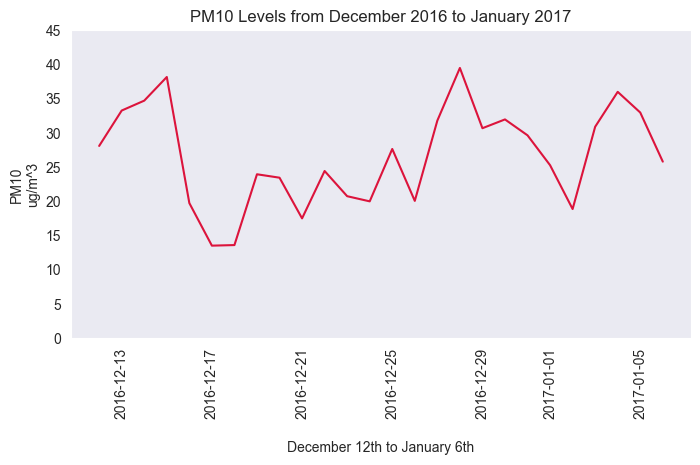

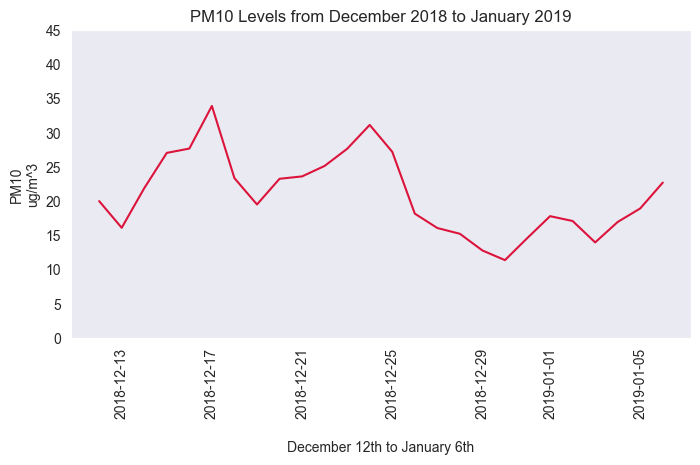

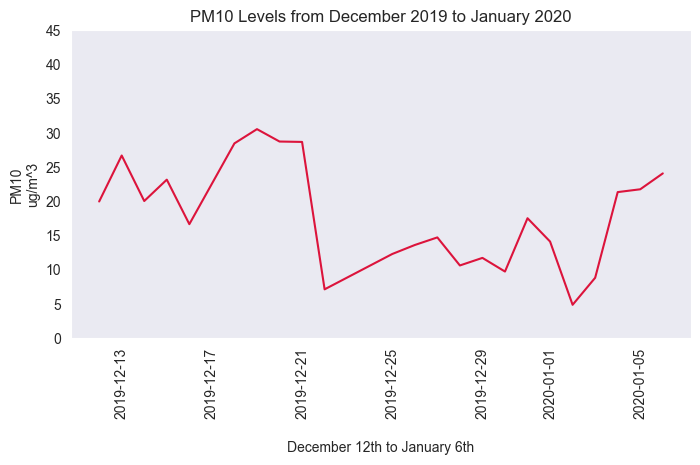

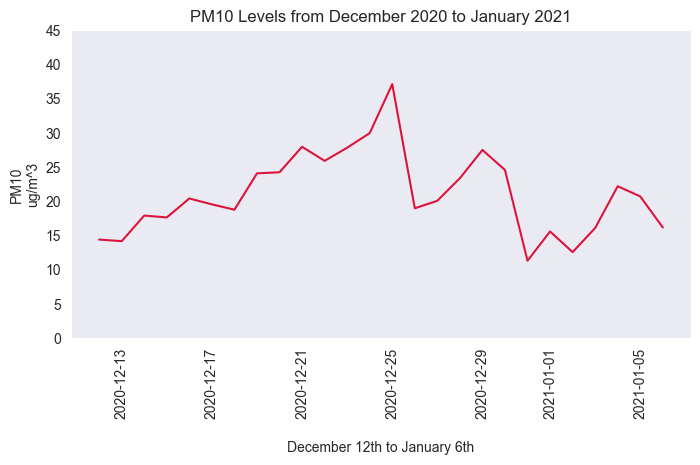

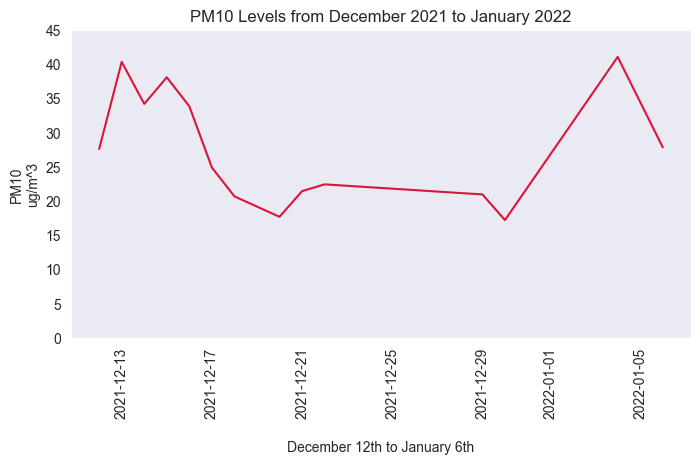

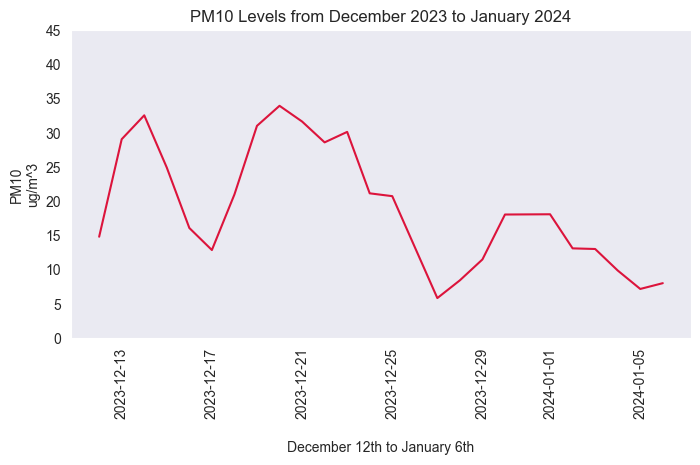

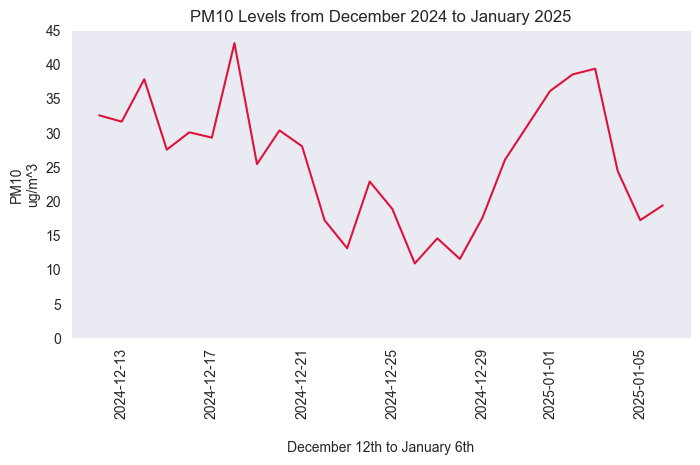

In [65]:
sns.set_style("dark")
for df in plotting:
    if df.shape[0] == 0: continue
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=df["Time"], y=df["PM10"], color="crimson")
    plt.ylim(0, 45)
    plt.xticks(rotation = 90)
    plt.title(f"PM10 Levels from December {df['Time'].dt.year.unique()[0]} to January {df['Time'].dt.year.unique()[1]}")
    plt.ylabel("PM10\nug/m^3")
    plt.xlabel(" \nDecember 12th to January 6th")
    plt.show()

In [66]:
dfPlot = dfHolidays[dfHolidays["PM2.5_flag"] == "OK"]

In [68]:
dfPlot1 = dfPlot[((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2016) & (dfPlot["Time"].dt.month == 12))]
dfPlot2 = dfPlot[((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 12))]
dfPlot3 = dfPlot[((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 12))]
dfPlot4 = dfPlot[((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 12))]
dfPlot5 = dfPlot[((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 12))]
dfPlot6 = dfPlot[((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 12))]
dfPlot7 = dfPlot[((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 12))]
dfPlot8 = dfPlot[((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 12))]
dfPlot9 = dfPlot[((dfPlot["Time"].dt.year == 2025) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 12))]
plotting = [dfPlot1, dfPlot2, dfPlot3, dfPlot4, dfPlot5, dfPlot6, dfPlot7, dfPlot8, dfPlot9]

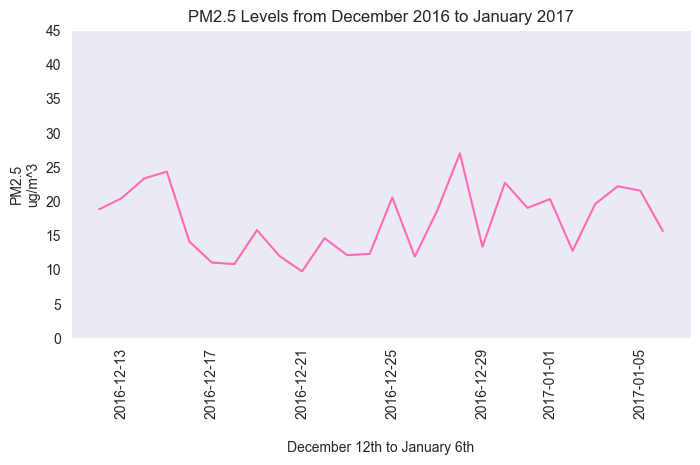

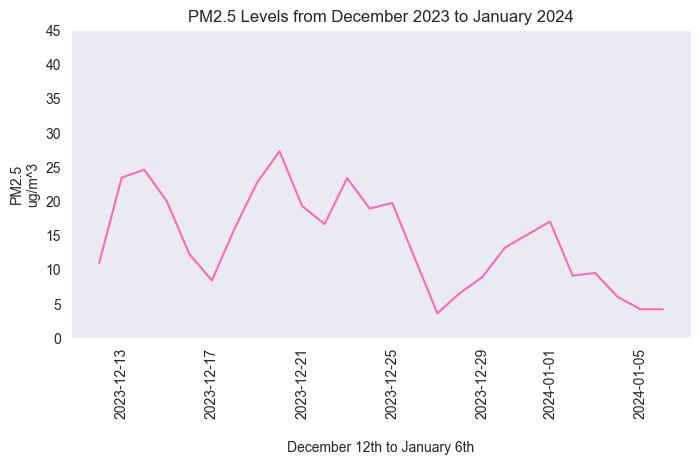

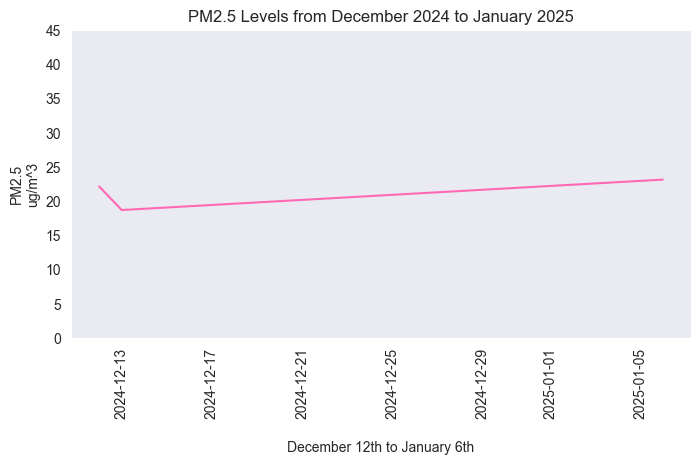

In [72]:
for df in plotting:
    if df.shape[0] == 0: continue
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=df["Time"], y=df["PM2.5"], color="hotpink")
    plt.ylim(0, 45)
    plt.xticks(rotation = 90)
    plt.title(f"PM2.5 Levels from December {df['Time'].dt.year.unique()[0]} to January {df['Time'].dt.year.unique()[1]}")
    plt.ylabel("PM2.5\nug/m^3")
    plt.xlabel(" \nDecember 12th to January 6th")
    plt.show()

In [134]:
dfPlot = dfHolidays[dfHolidays["CO_flag"] == "OK"]

In [135]:
dfPlot["CO"].describe()

count    208.000000
mean       0.461146
std        0.147099
min        0.099764
25%        0.354637
50%        0.421384
75%        0.564157
max        0.865500
Name: CO, dtype: float64

In [136]:
dfPlot1 = dfPlot[((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2016) & (dfPlot["Time"].dt.month == 12))]
dfPlot2 = dfPlot[((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 12))]
dfPlot3 = dfPlot[((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 12))]
dfPlot4 = dfPlot[((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 12))]
dfPlot5 = dfPlot[((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 12))]
dfPlot6 = dfPlot[((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 12))]
dfPlot7 = dfPlot[((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 12))]
dfPlot8 = dfPlot[((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 12))]
dfPlot9 = dfPlot[((dfPlot["Time"].dt.year == 2025) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 12))]
plotting = [dfPlot1, dfPlot2, dfPlot3, dfPlot4, dfPlot5, dfPlot6, dfPlot7, dfPlot8, dfPlot9]

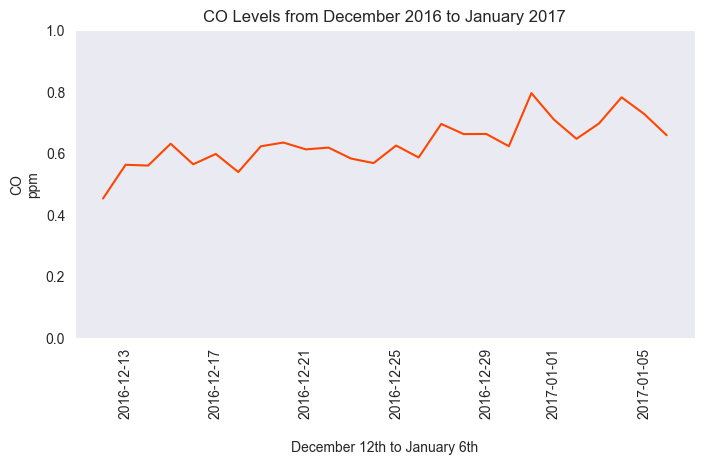

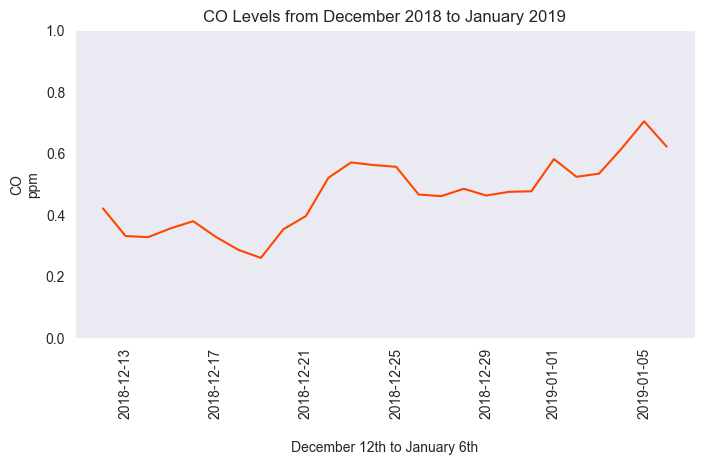

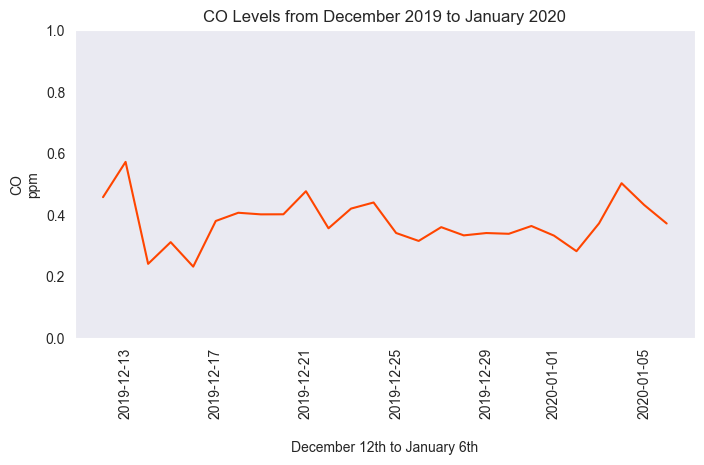

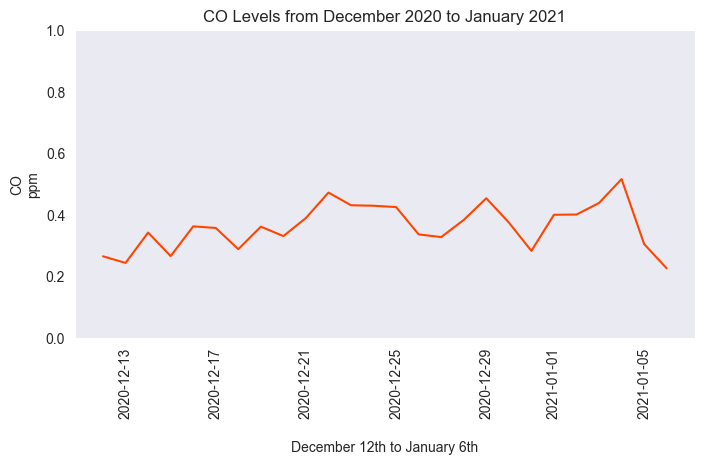

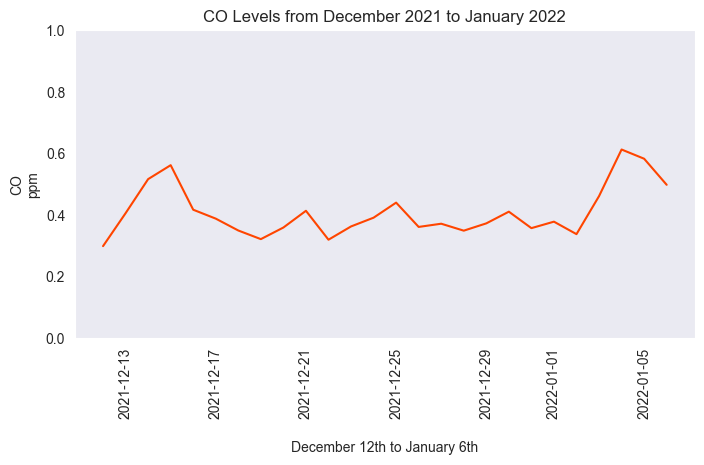

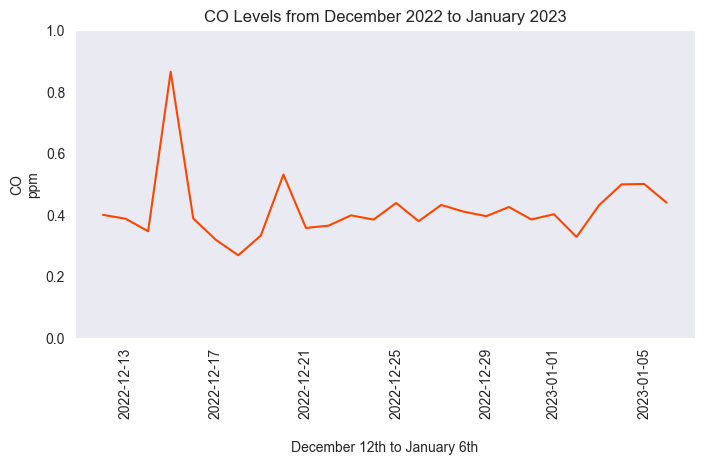

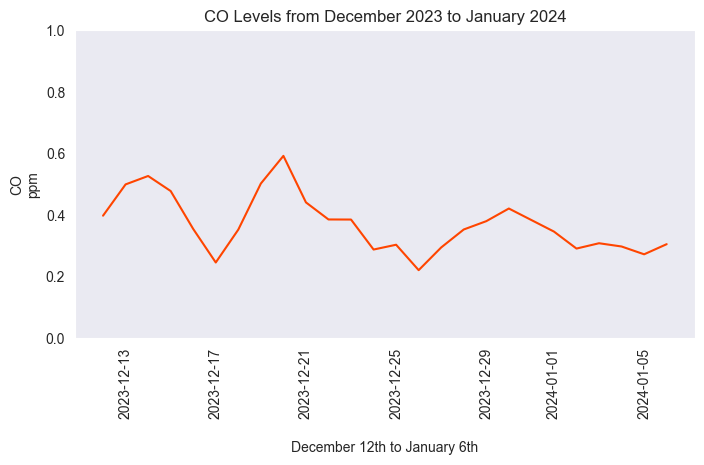

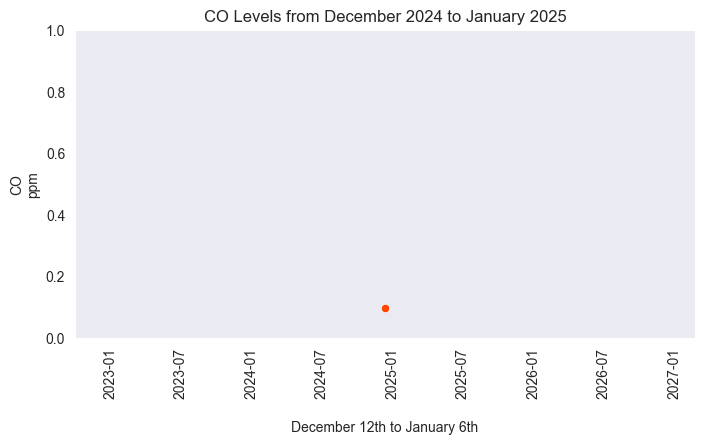

In [137]:
for df in plotting:
    if df.shape[0] == 0: continue
    plt.figure(figsize=(8, 4))
    if df.shape[0] == 1: sns.scatterplot(x=df["Time"], y=df["CO"], color="orangered")
    else: sns.lineplot(x=df["Time"], y=df["CO"], color="orangered")
    plt.ylim(0, 1)
    plt.xticks(rotation = 90)
    try: year1 = df['Time'].dt.year.unique()[1]
    except: year1 = df['Time'].dt.year.unique()[0]+1
    plt.title(f"CO Levels from December {df['Time'].dt.year.unique()[0]} to January {year1}")
    plt.ylabel("CO\nppm")
    plt.xlabel(" \nDecember 12th to January 6th")
    plt.show()

In [138]:
dfPlot = dfHolidays[dfHolidays["NO_flag"] == "OK"]

In [139]:
dfPlot1 = dfPlot[((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2016) & (dfPlot["Time"].dt.month == 12))]
dfPlot2 = dfPlot[((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 12))]
dfPlot3 = dfPlot[((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 12))]
dfPlot4 = dfPlot[((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 12))]
dfPlot5 = dfPlot[((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 12))]
dfPlot6 = dfPlot[((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 12))]
dfPlot7 = dfPlot[((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 12))]
dfPlot8 = dfPlot[((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 12))]
dfPlot9 = dfPlot[((dfPlot["Time"].dt.year == 2025) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 12))]
plotting = [dfPlot1, dfPlot2, dfPlot3, dfPlot4, dfPlot5, dfPlot6, dfPlot7, dfPlot8, dfPlot9]

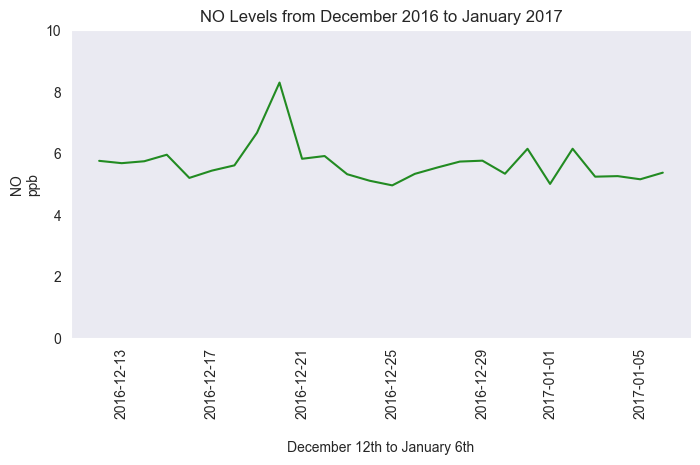

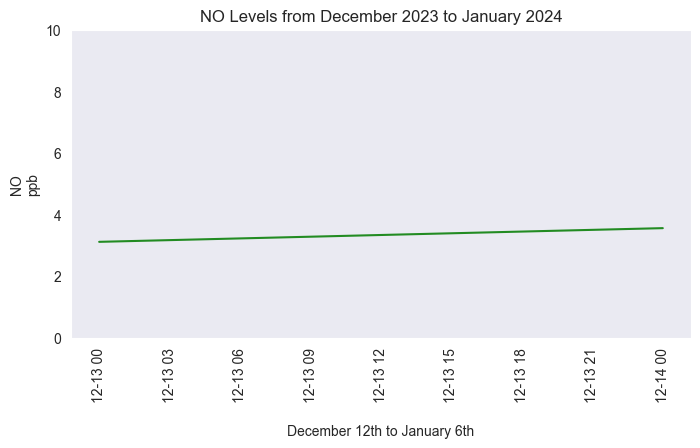

In [141]:
for df in plotting:
    if df.shape[0] == 0: continue
    plt.figure(figsize=(8, 4))
    if df.shape[0] == 1: sns.scatterplot(x=df["Time"], y=df["NO"], color="forestgreen")
    else: sns.lineplot(x=df["Time"], y=df["NO"], color="forestgreen")
    plt.ylim(0, 10)
    plt.xticks(rotation = 90)
    try: year1 = df['Time'].dt.year.unique()[1]
    except: year1 = df['Time'].dt.year.unique()[0]+1
    plt.title(f"NO Levels from December {df['Time'].dt.year.unique()[0]} to January {year1}")
    plt.ylabel("NO\nppb")
    plt.xlabel(" \nDecember 12th to January 6th")
    plt.show()

In [142]:
dfPlot = dfHolidays[dfHolidays["NO2_flag"] == "OK"]

In [143]:
dfPlot1 = dfPlot[((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2016) & (dfPlot["Time"].dt.month == 12))]
dfPlot2 = dfPlot[((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2017) & (dfPlot["Time"].dt.month == 12))]
dfPlot3 = dfPlot[((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2018) & (dfPlot["Time"].dt.month == 12))]
dfPlot4 = dfPlot[((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2019) & (dfPlot["Time"].dt.month == 12))]
dfPlot5 = dfPlot[((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2020) & (dfPlot["Time"].dt.month == 12))]
dfPlot6 = dfPlot[((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2021) & (dfPlot["Time"].dt.month == 12))]
dfPlot7 = dfPlot[((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2022) & (dfPlot["Time"].dt.month == 12))]
dfPlot8 = dfPlot[((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2023) & (dfPlot["Time"].dt.month == 12))]
dfPlot9 = dfPlot[((dfPlot["Time"].dt.year == 2025) & (dfPlot["Time"].dt.month == 1)) | ((dfPlot["Time"].dt.year == 2024) & (dfPlot["Time"].dt.month == 12))]
plotting = [dfPlot1, dfPlot2, dfPlot3, dfPlot4, dfPlot5, dfPlot6, dfPlot7, dfPlot8, dfPlot9]

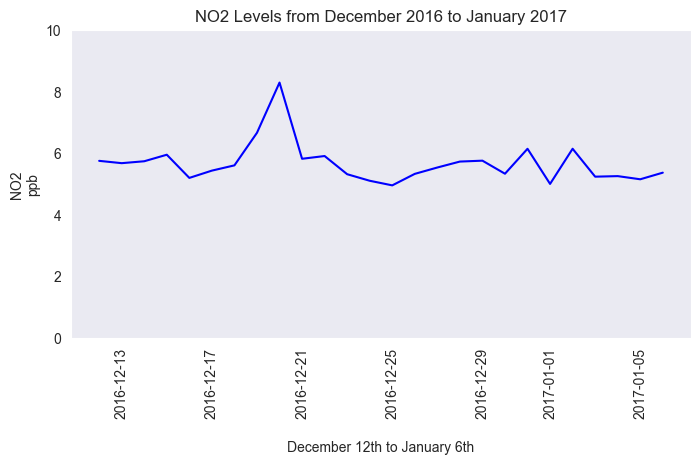

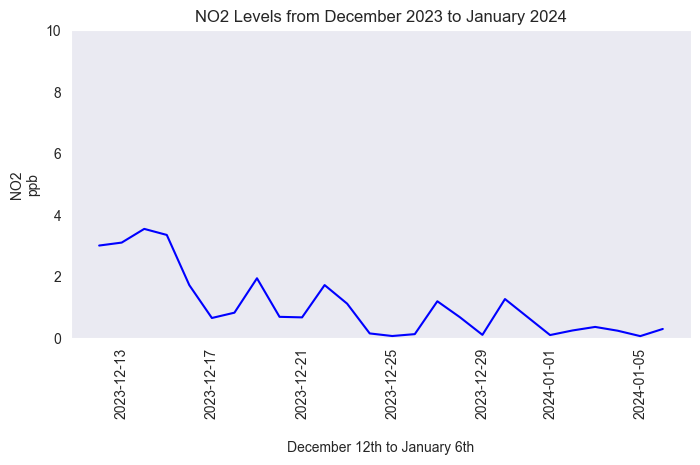

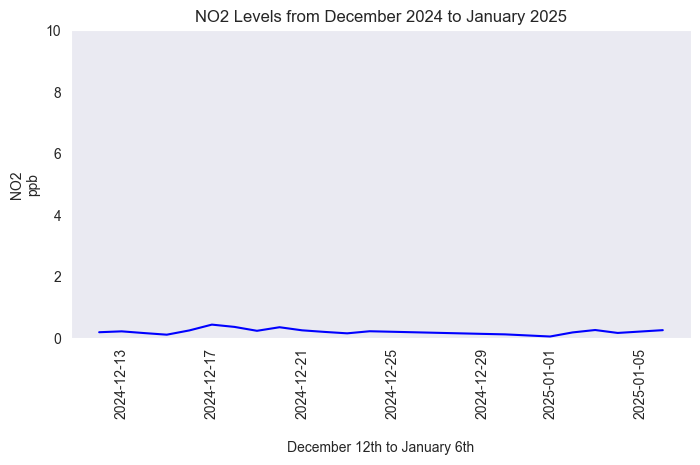

In [146]:
for df in plotting:
    if df.shape[0] == 0: continue
    plt.figure(figsize=(8, 4))
    if df.shape[0] == 1: sns.scatterplot(x=df["Time"], y=df["NO"], color="blue")
    else: sns.lineplot(x=df["Time"], y=df["NO"], color="blue")
    plt.ylim(0, 10)
    plt.xticks(rotation = 90)
    try: year1 = df['Time'].dt.year.unique()[1]
    except: year1 = df['Time'].dt.year.unique()[0]+1
    plt.title(f"NO2 Levels from December {df['Time'].dt.year.unique()[0]} to January {year1}")
    plt.ylabel("NO2\nppb")
    plt.xlabel(" \nDecember 12th to January 6th")
    plt.show()